In [72]:
# import necessary Libraries
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
from itertools import combinations
from collections import Counter

# Read data

### *Merging 12 months of sales data into a single file*

In [73]:
# Merging 12 months of sales data into a single file
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

### *Read in updated dataframe*

In [74]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### *The basic information of the dataset*

In [75]:
all_data.shape

(186850, 6)

In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Data processing

## Clean up the data

In [77]:
# show 10 row data 
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


all_data.isnull().sum()

### *Drop rows of NAN*

In [78]:
# count the number of data that are null
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [79]:
nan_df = all_data[all_data.isnull().any(axis=1)]
nan_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [81]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### *drop duplicated rows*

In [82]:
print("Duplicated rows: ", all_data.duplicated().sum())

Duplicated rows:  618


In [83]:
all_data = all_data[~ all_data.duplicated()]
print("Duplicated rows: ", all_data.duplicated().sum())

Duplicated rows:  0


### *Find `Or` and delete it*

In [84]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [85]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### *Convert columns to the correct type*

In [86]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### *convert `Order Date` column to datetime*

In [87]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


## Augment data with addtional columns

###  *Add month column*

In [88]:
all_data['Month'] = pd.DatetimeIndex(all_data['Order Date']).month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### *Add a sales column*

In [89]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### *Add city and state columns*

In [90]:
# let's use .apply()

# the function to get the city name
def get_city(address):
    return address.split(',')[1]

# the function to get the state name  
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA


### *Add the Hour and Minute columns*

In [91]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,9,27


# ---------------------------------------------- QUESTION ----------------------------------------------

## Question 1: What is the total number of sales in 2019?

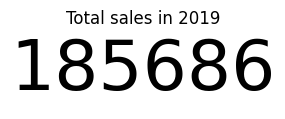

In [92]:
#find length of sales in 2019
total_sales_2019 = len(all_data)

#generate total sales visual
fig, total_sales_visual = plt.subplots(figsize=(3, 1))
total_sales_visual.axis('off')
total_sales_visual.text(0.5, 0.5, str(total_sales_2019), fontsize=50, ha='center', va='center')
total_sales_visual.set_title('Total sales in 2019')
plt.show()

## Question 2: What is the annual & monthly revenue in 2019?

#### - Annual revenua 2019


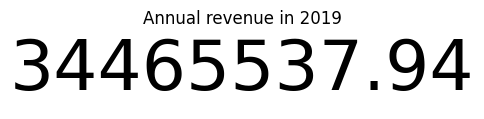

In [93]:
#find annual summary
annual_revenue_2019 = all_data['Sales'].sum()

#generate annual revenue visual
fig, annual_visual = plt.subplots(figsize=(3, 1))
annual_visual.axis('off')
annual_visual.text(0.5, 0.5, "{:.2f}".format(round(annual_revenue_2019, 2)), fontsize=50, ha='center', va='center')
annual_visual.set_title('Annual revenue in 2019')
plt.show()

#### - Monthly revenue 2019

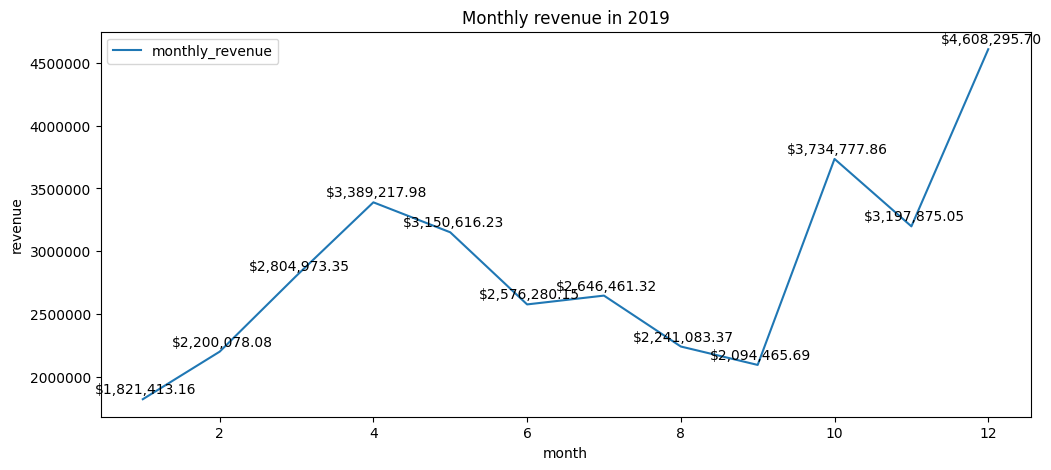

In [94]:
#find monthly summary
monthly_revenue_2019 = all_data.groupby(all_data['Order Date'].dt.month)['Sales'].sum()
monthly_revenue_2019 = monthly_revenue_2019.to_frame(name='monthly_revenue')
monthly_revenue_2019.index.name = 'month'
monthly_revenue_2019.reset_index(inplace=True)

#generate monthly revenue visual
monthly_visual = monthly_revenue_2019.plot(kind='line', x='month', y='monthly_revenue', figsize=(12, 5))
monthly_visual.ticklabel_format(style='plain', axis='y')
monthly_visual.set_title('Monthly revenue in 2019')
monthly_visual.set_ylabel('revenue')

#add data callouts
for x, y in zip(monthly_revenue_2019['month'], monthly_revenue_2019['monthly_revenue']):
    label = "${:,.2f}".format(y)
    monthly_visual.annotate(label, (x,y), textcoords="offset points", xytext=(2,4), ha='center')
plt.show()

## Question 3: Which state generated the most highest & lowest sales on average?

#### - Sales by state

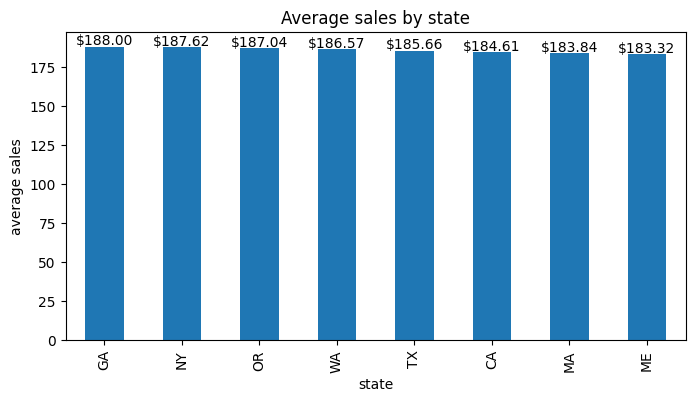

In [95]:
#create dataframe for sales by state
sales_by_state = all_data.groupby('State')['Sales'].mean()
sales_by_state = sales_by_state.to_frame(name='state_revenue')
sales_by_state.index.name = 'state'
sales_by_state = sales_by_state.sort_values(by='state_revenue', ascending=False)
sales_by_state.reset_index(inplace=True)

#generate sales by state visual
state_visual = sales_by_state.plot(kind='bar', x='state', y='state_revenue', figsize=(8, 4), legend=False)
state_visual.ticklabel_format(style='plain', axis='y')
state_visual.set_title("Average sales by state")
state_visual.set_ylabel('average sales')

#add data callouts to each point
for p in state_visual.patches:
    label = "${:,.2f}".format(p.get_height())
    state_visual.annotate(label, (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')
plt.show()


#### - Max & min sales in sales by state

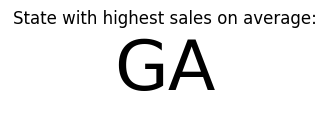

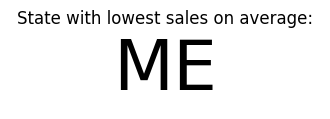

In [96]:
#find state with max & min in state revenue
state_highest_sales = sales_by_state['state'][sales_by_state['state_revenue'].idxmax()]
state_lowest_sales = sales_by_state['state'][sales_by_state['state_revenue'].idxmin()]

#generate visual for most sales
fig, highest_state_visual = plt.subplots(figsize=(4, 1))
highest_state_visual.axis('off')
highest_state_visual.text(0.5, 0.5, str(state_highest_sales), fontsize=50, ha='center', va='center')
highest_state_visual.set_title('State with highest sales on average:')
plt.show()

#generate visual for lowest sales
fig, lowest_state_visual = plt.subplots(figsize=(4, 1))
lowest_state_visual.axis('off')
lowest_state_visual.text(0.5, 0.5, str(state_lowest_sales), fontsize=50, ha='center', va='center')
lowest_state_visual.set_title('State with lowest sales on average:')
plt.show()

## Question 4:  When were the best & worst selling periods?  How much was earned that month?

#### Total revenue 12 months

In [97]:
results = all_data.groupby('Month').sum()
results['Sales']

C:\Users\TranLam\AppData\Local\Temp\ipykernel_15480\4220905623.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

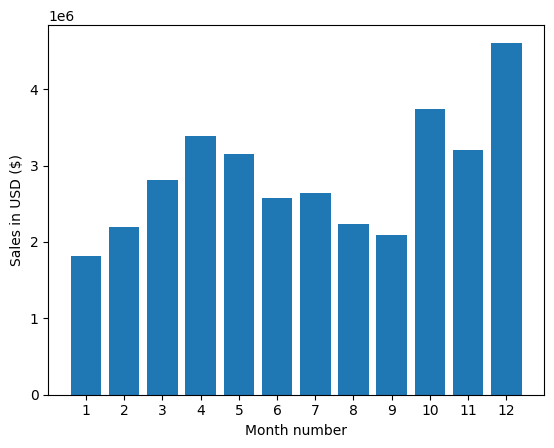

In [98]:
# visualize
months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### - Monthly revenue conparision

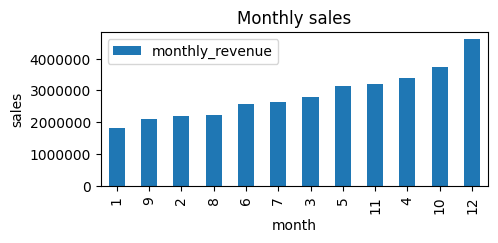

In [99]:
#sort the dataframe for monthly revenue
monthly_revenue_2019_sorted = monthly_revenue_2019.sort_values(by='monthly_revenue')

#generate bar visual for monthly revenue
monthly_sorted_visual = monthly_revenue_2019_sorted.plot(kind='bar', x='month', y='monthly_revenue', figsize=(5, 2))
monthly_sorted_visual.ticklabel_format(style='plain', axis='y')
monthly_sorted_visual.set_title("Monthly sales")
monthly_sorted_visual.set_ylabel('sales')
plt.show()

#### - Min & max monthly revenue

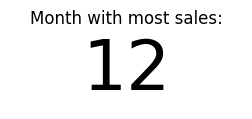

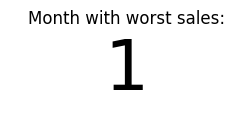

In [100]:
#find max and min value for month in monthly revenue
best_month = monthly_revenue_2019['month'][monthly_revenue_2019['monthly_revenue'].idxmax()]
worst_month = monthly_revenue_2019['month'][monthly_revenue_2019['monthly_revenue'].idxmin()]

#generate best selling month as visual
fig, best_month_visual = plt.subplots(figsize=(3, 1))
best_month_visual.axis('off')
best_month_visual.text(0.5, 0.5, str(best_month), fontsize=50, ha='center', va='center')
best_month_visual.set_title('Month with most sales:')
plt.show()

#generate worst selling month as visual
fig, worst_month_visual = plt.subplots(figsize=(3, 1))
worst_month_visual.axis('off')
worst_month_visual.text(0.5, 0.5, str(worst_month), fontsize=50, ha='center', va='center')
worst_month_visual.set_title('Month with worst sales:')
plt.show()


## Question 5: Which products sell best & worst?

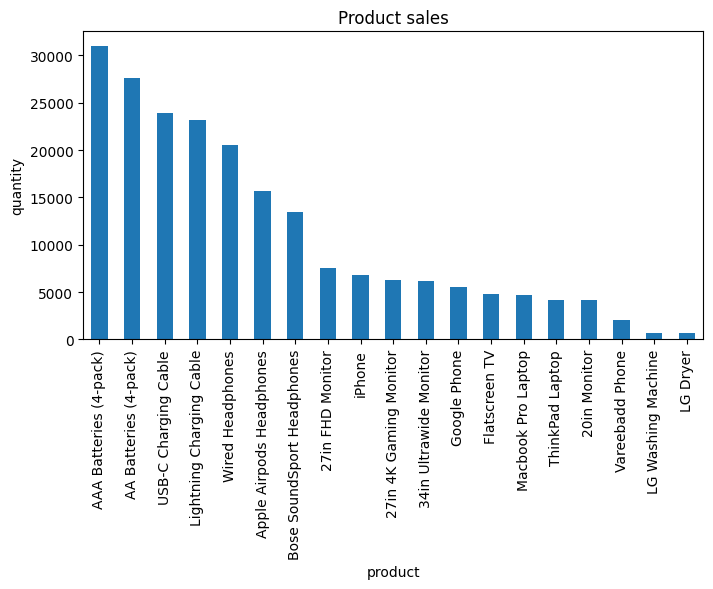

In [101]:
#create dataframe for product_sales
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()
product_sales = product_sales.to_frame(name='product_sales')
product_sales.index.name = 'product'
product_sales = product_sales.sort_values(by='product_sales', ascending=False)
product_sales.reset_index(inplace=True)

#generate bar visual for product sales
product_sales_visual = product_sales.plot(kind='bar', x='product', y='product_sales', figsize=(8, 4), legend=False)
product_sales_visual.ticklabel_format(style='plain', axis='y')
product_sales_visual.set_title("Product sales")
product_sales_visual.set_ylabel('quantity')
plt.show()

#### - Max & min sales for product

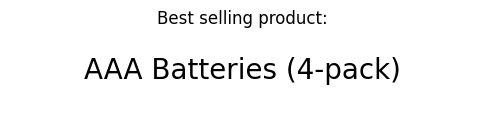

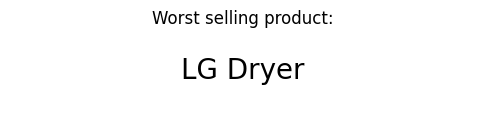

In [102]:
#find best selling and worst selling for product in product sales
best_selling_product = product_sales['product'][product_sales['product_sales'].idxmax()]
worst_selling_product = product_sales['product'][product_sales['product_sales'].idxmin()]

#generate visual for best selling product
fig, best_selling_visual = plt.subplots(figsize=(6, 1))
best_selling_visual.axis('off')
best_selling_visual.text(0.5, 0.5, str(best_selling_product), fontsize=20, ha='center', va='center')
best_selling_visual.set_title('Best selling product:')
plt.show()

#generate visual for worst selling product
fig, worst_selling_visual = plt.subplots(figsize=(6, 1))
worst_selling_visual.axis('off')
worst_selling_visual.text(0.5, 0.5, str(worst_selling_product), fontsize=20, ha='center', va='center')
worst_selling_visual.set_title('Worst selling product:')
plt.show()

## Question 6: What products is the most cheap & expensive?

#### - Price list comparision

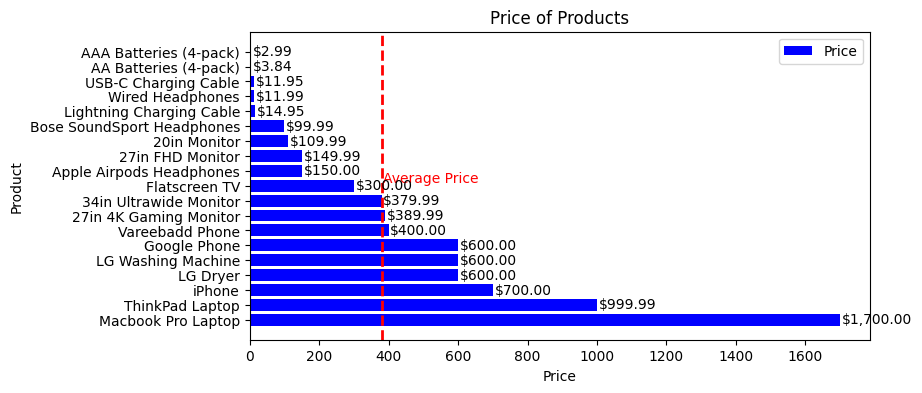

In [103]:
#find price for each item list
products_list = all_data.groupby('Product')['Price Each'].first().reset_index()
products_list = products_list.sort_values(by='Price Each', ascending=False)

#find product price average
avereage_product_price = products_list['Price Each'].mean()

#generate a horizontal bar chart
fig, pricing_visual = plt.subplots(figsize=(8, 4))
pricing_visual.barh(y=products_list['Product'], width=products_list['Price Each'], color='blue')
pricing_visual.legend(['Price'])
pricing_visual.set_title('Price of Products')
pricing_visual.set_xlabel('Price')
pricing_visual.set_ylabel('Product')
pricing_visual.axvline(x=avereage_product_price, color='red', linestyle='--', linewidth=2)
pricing_visual.text(avereage_product_price+5, len(products_list)/2, 'Average Price', color='red', ha='left', va='center')

#add labels to the bars
for i, v in enumerate(products_list['Price Each']):
    pricing_visual.text(v+5, i, "${:,.2f}".format(v), color='black', ha='left', va='center')
plt.show()


#### - Max & min price in product

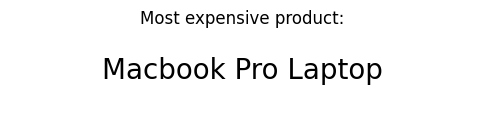

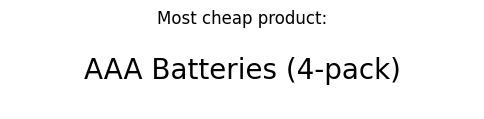

In [118]:
#find cheapest and most expensive and cheap products
most_expensive_product = products_list['Product'][products_list['Price Each'].idxmax()]
most_cheap_product = products_list['Product'][products_list['Price Each'].idxmin()]

#generate visual for most cheap product
fig, expensive_product_visual = plt.subplots(figsize=(6, 1))
expensive_product_visual.axis('off')
expensive_product_visual.text(0.5, 0.5, str(most_expensive_product), fontsize=20, ha='center', va='center')
expensive_product_visual.set_title('Most expensive product:')
plt.show()

#generate visual for most expensive product
fig, cheap_product_visual = plt.subplots(figsize=(6, 1))
cheap_product_visual.axis('off')
cheap_product_visual.text(0.5, 0.5, str(most_cheap_product), fontsize=20, ha='center', va='center')
cheap_product_visual.set_title('Most cheap product:')
plt.show()


## Question 7: What city had the highest number of sales?

In [119]:
results = all_data.groupby('City').sum()
results

C:\Users\TranLam\AppData\Local\Temp\ipykernel_15480\2386508471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16584,2778608.69,104649,2794199.07,214003,442412
Austin (TX),11137,1808340.03,69720,1818044.33,141688,288674
Boston (MA),22494,3634398.40,140898,3658627.65,287705,589414
Dallas (TX),16707,2750026.38,104447,2765373.96,214078,434330
Los Angeles (CA),33247,5417171.70,208020,5448304.28,426924,865442
New York City (NY),27903,4632920.54,175557,4661867.14,357214,733011
Portland (ME),2746,446752.36,17119,449321.38,35152,72743
Portland (OR),11291,1859836.44,70517,1870010.56,144242,295104
San Francisco (CA),50169,8204001.38,314949,8254743.55,642269,1317094


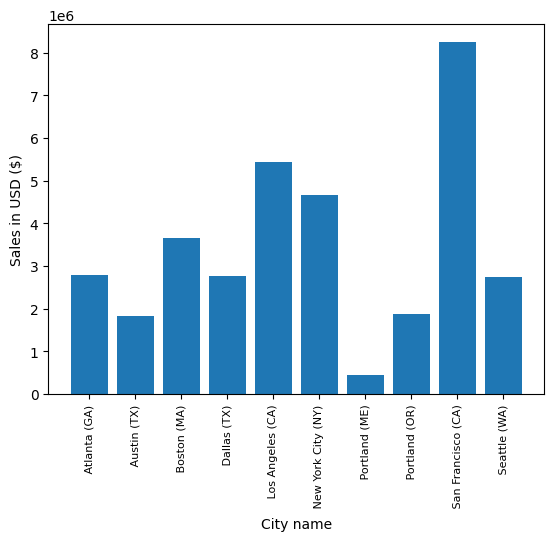

In [120]:
Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities, results['Sales'])
plt.xticks(Cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

## Question 8: What time should we display advertisements to maximize likelihood of customer's buysing product?

In [121]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Minute
Hour,,,,,,,,,,,
0,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902
1,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
2,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
3,830,830,830,830,830,830,830,830,830,830,830
4,852,852,852,852,852,852,852,852,852,852,852
5,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
6,2481,2481,2481,2481,2481,2481,2481,2481,2481,2481,2481
7,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
8,6252,6252,6252,6252,6252,6252,6252,6252,6252,6252,6252


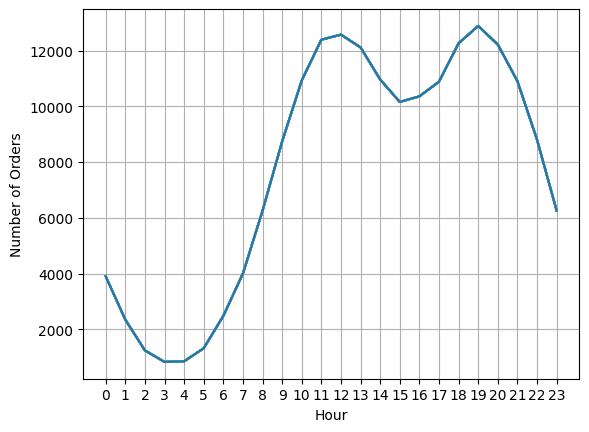

In [122]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

## Question 9: What products are most often sold together

In [123]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)

C:\Users\TranLam\AppData\Local\Temp\ipykernel_15480\4103013097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"
250,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [124]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
                 
for key, value in count.most_common(20):
                 print(key, value)
                 

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Charging Cable') 50
('Apple Airpods Headphones', 'AAA Batteries (4-

## Question 10: What product sold the most? Why do you think it sold the most?

C:\Users\TranLam\AppData\Local\Temp\ipykernel_15480\1501862489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


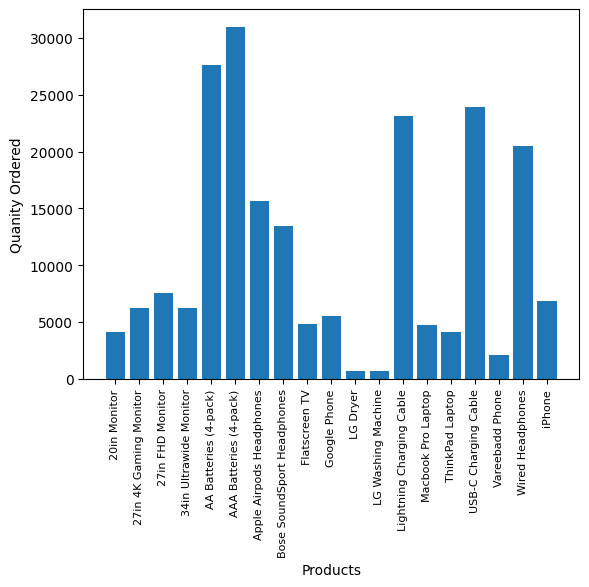

In [125]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quanity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

C:\Users\TranLam\AppData\Local\Temp\ipykernel_15480\2819882728.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\TranLam\AppData\Local\Temp\ipykernel_15480\2819882728.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size = 8)


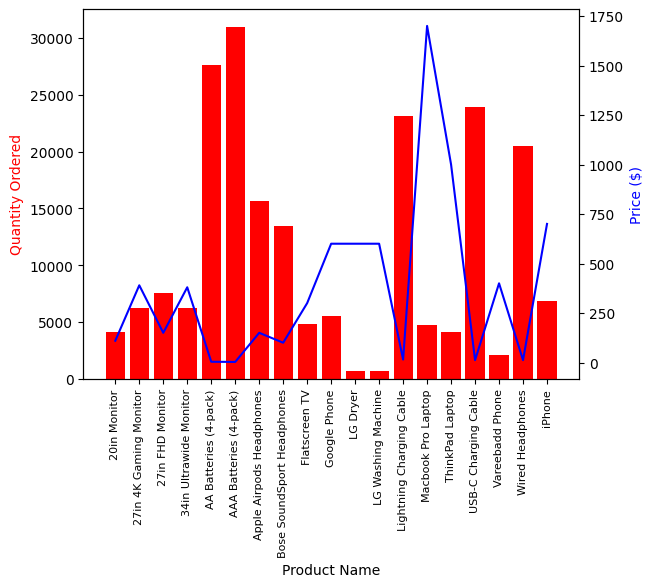

In [126]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'r')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size = 8)

plt.show()